In [1]:
# import contingencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# import csv files
pres = pd.read_csv('p_all.csv')
bgc = pd.read_csv('b_all.csv')
stategroups = pd.read_csv('stategroups.csv')

In [44]:
# claen up df and merge tables
pres = pres.loc[pres['State'] !='Total']
bgc = bgc.rename(columns={'state' : 'State', 'year':'Year'})

compare = bgc.merge(pres,"outer")
compare = compare.dropna(thresh = 5)

In [45]:
blue_states = stategroups.loc[stategroups['Group'] == 'Blue']
blue_states_df = pd.DataFrame(blue_states)

In [46]:
swing_states = stategroups.loc[stategroups['Group'] == 'Swing']
swing_states_df = pd.DataFrame(swing_states)

In [47]:
blue_results = compare.merge(blue_states)

In [48]:
swing_results = compare.merge(swing_states)

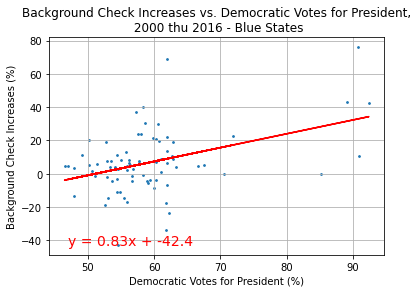

In [39]:
x_values = blue_results["PercentD"]
y_values = blue_results["pct"]

plt.scatter(blue_results["PercentD"],blue_results["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000 thu 2016 - Blue States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [40]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.17424172787005668


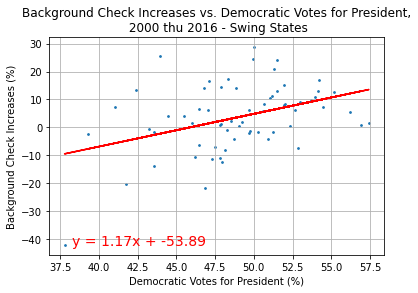

In [42]:
x_values = swing_results["PercentD"]
y_values = swing_results["pct"]

plt.scatter(swing_results["PercentD"],swing_results["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000 thu 2016 - Swing States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [43]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.15762105864156797
